In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection, preprocessing, tree

In [2]:
# Dataset that contains NBA players stats from 1950 - 2017 (67 seasons)

nbaStats = pd.read_csv("./nba-players-stats/Seasons_Stats.csv")

In [3]:
# Let's take a look at our raw data

nbaStats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [4]:
#Since the NBA first adopted the 3 point line in 1979. We will drop the data where ['Year'] is less than 1979.

nbaStats_3ptAdded = nbaStats[nbaStats["Year"] >= 1979] 

In [5]:
# -------------------- Data Wrangling -------------------- #
# Filling all NaN inputs with 0
# Converting all the inputs of the coloumns 'Year', 'Age', 'G', and 'GS', etc, to int.

nbaStats_3ptAdded = nbaStats_3ptAdded.fillna(0)
player3ptStats = nbaStats_3ptAdded[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G','FG', 'FGA', '3P', '3PA', '2P', '2PA', 'PTS']]
player3ptStats[['Year', 'Age', 'G','FG', 'FGA', '3P', '3PA', '2P', '2PA', 'PTS']] = player3ptStats[['Year', 'Age', 'G','FG', 'FGA', '3P', '3PA', '2P', '2PA', 'PTS']].astype(int)

/Users/ericleung/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
# Now we are done preprocessing our dataset. 
# Let take a look at the first 5 rows of our preprocessed dataframe.

player3ptStats.head()

,Year,Player,Pos,Age,Tm,G,FG,FGA,3P,3PA,2P,2PA,PTS
5382,1979,Kareem Abdul-Jabbar*,C,31,LAL,80,777,1347,0,0,777,1347,1903
5383,1979,Tom Abernethy,PF,24,GSW,70,176,342,0,0,176,342,422
5384,1979,Alvan Adams,C,24,PHO,77,569,1073,0,0,569,1073,1369
5385,1979,Lucius Allen,PG,31,KCK,31,69,174,0,0,69,174,157
5386,1979,Kim Anderson,SF,23,POR,21,24,77,0,0,24,77,63


In [7]:
# The last 5 rows of our preprocessed dataframe.

player3ptStats.tail()

,Year,Player,Pos,Age,Tm,G,FG,FGA,3P,3PA,2P,2PA,PTS
24686,2017,Cody Zeller,PF,24,CHO,62,253,443,0,1,253,442,639
24687,2017,Tyler Zeller,C,27,BOS,51,78,158,0,1,78,157,178
24688,2017,Stephen Zimmerman,C,20,ORL,19,10,31,0,0,10,31,23
24689,2017,Paul Zipser,SF,22,CHI,44,88,221,33,99,55,122,240
24690,2017,Ivica Zubac,C,19,LAL,38,126,238,0,3,126,235,284


In [8]:
# Example: Finding the player who has the most blocks in one season (From 1979 - 2017)
(player3ptStats['Player'][nbaStats_3ptAdded.BLK == nbaStats_3ptAdded.BLK.max()], nbaStats_3ptAdded.BLK.max().astype(int))

(7638    Mark Eaton
 Name: Player, dtype: object, 456)

In [9]:
# We can use 'Player' as an index for our dataframe.

player3ptStats.set_index('Player', inplace=True)

# Now our dataframe is organized accordingly by playes' names.

player3ptStats

,Year,Pos,Age,Tm,G,FG,FGA,3P,3PA,2P,2PA,PTS
Player,,,,,,,,,,,,
Kareem Abdul-Jabbar*,1979,C,31,LAL,80,777,1347,0,0,777,1347,1903
Tom Abernethy,1979,PF,24,GSW,70,176,342,0,0,176,342,422
Alvan Adams,1979,C,24,PHO,77,569,1073,0,0,569,1073,1369
Lucius Allen,1979,PG,31,KCK,31,69,174,0,0,69,174,157
Kim Anderson,1979,SF,23,POR,21,24,77,0,0,24,77,63
Tiny Archibald*,1979,PG,30,BOS,69,259,573,0,0,259,573,760
Tate Armstrong,1979,SG,23,CHI,26,28,70,0,0,28,70,66
Dennis Awtrey,1979,C,30,TOT,63,44,107,0,0,44,107,129
Dennis Awtrey,1979,C,30,BOS,23,17,44,0,0,17,44,50


In [10]:
# Say if we would like to take a look at the statistics of Michael Jordan's NBA career.

player3ptStats.loc['Michael Jordan*'] 

,Year,Pos,Age,Tm,G,FG,FGA,3P,3PA,2P,2PA,PTS
Player,,,,,,,,,,,,
Michael Jordan*,1985,SG,21,CHI,82,837,1625,9,52,828,1573,2313
Michael Jordan*,1986,SG,22,CHI,18,150,328,3,18,147,310,408
Michael Jordan*,1987,SG,23,CHI,82,1098,2279,12,66,1086,2213,3041
Michael Jordan*,1988,SG,24,CHI,82,1069,1998,7,53,1062,1945,2868
Michael Jordan*,1989,SG,25,CHI,81,966,1795,27,98,939,1697,2633
Michael Jordan*,1990,SG,26,CHI,82,1034,1964,92,245,942,1719,2753
Michael Jordan*,1991,SG,27,CHI,82,990,1837,29,93,961,1744,2580
Michael Jordan*,1992,SG,28,CHI,80,943,1818,27,100,916,1718,2404
Michael Jordan*,1993,SG,29,CHI,78,992,2003,81,230,911,1773,2541


In [11]:
# We can take a look at a great example of a player transformed his play style completely just 
# to adapt to the new NBA 3pt era. His name is Brook Lopez.
# Let's check his statistics throughout his career 

player3ptStats.loc['Brook Lopez']

,Year,Pos,Age,Tm,G,FG,FGA,3P,3PA,2P,2PA,PTS
Player,,,,,,,,,,,,
Brook Lopez,2009,C,20,NJN,82,448,844,0,2,448,842,1068
Brook Lopez,2010,C,21,NJN,82,563,1129,0,2,563,1127,1542
Brook Lopez,2011,C,22,NJN,82,644,1309,0,1,644,1308,1673
Brook Lopez,2012,C,23,NJN,5,38,77,0,0,38,77,96
Brook Lopez,2013,C,24,BRK,74,570,1094,0,1,570,1093,1437
Brook Lopez,2014,C,25,BRK,17,129,229,0,1,129,228,352
Brook Lopez,2015,C,26,BRK,72,506,987,1,10,505,977,1236
Brook Lopez,2016,C,27,BRK,73,591,1157,2,14,589,1143,1501
Brook Lopez,2017,C,28,BRK,75,555,1172,134,387,421,785,1539


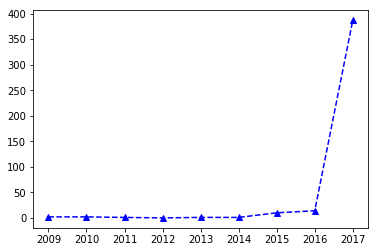

In [18]:
# We can even plot out a simple line graph to visualize his 3pt attempts increases by a huge amount throughout his career.
# bLopez3PA is a pandas series contains the column of Brook Lopez's 3pt attempts per season.

bLopez3PA = player3ptStats.loc['Brook Lopez', '3PA']

# Since 'bLopez3PA' is a pandas series, we need to convert it into a list.
bLopez3PA.tolist()

season = player3ptStats.loc['Brook Lopez', 'Year'].tolist()
# Now we plot the graph!

plt.plot(season, bLopez3PA, 'b^--', label="Brook's 3PA")